# Sales Analysis

## EDA

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
train = pd.read_csv('sales_data.csv')
train.head(10)

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
5,2022-01-05,Watch,Accessories,150.0,10.0,1500.0
6,2022-01-06,Smartphone,Electronics,600.0,8.0,4800.0
7,2022-01-06,Tablet,Electronics,400.0,5.0,2000.0
8,2022-01-07,Coat,Clothing,100.0,10.0,1000.0
9,2022-01-08,Smartwatch,Accessories,200.0,12.0,2400.0


### Understand Data

In [3]:
# See Information about Data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [4]:
# See Columns
train.columns

Index(['date', 'product', 'category', 'price', 'quantity', 'revenue'], dtype='object')

In [5]:
# See Shape of Data
train.shape

(369, 6)

In [6]:
# See Values for each Column
for i in train.columns:
    if(i!='date'):
        print("-"*15,i,"-"*15,"\n")
        print(train[i].value_counts())

--------------- product --------------- 

Smartphone    82
T-Shirt       38
Smartwatch    36
Coat          35
Speaker       25
Backpack      24
Hoodie        24
Sneakers      24
Jeans         24
Watch         22
Headphones    13
Wallet        12
Tablet         9
Laptop         1
Name: product, dtype: int64
--------------- category --------------- 

Electronics    130
Clothing       120
Accessories     70
Bags            23
Shoes           23
Clohting         1
Bgas             1
Shoeses          1
Name: category, dtype: int64
--------------- price --------------- 

600.0     82
80.0      49
100.0     48
50.0      48
20.0      38
200.0     36
40.0      24
150.0     21
30.0      11
400.0      9
1200.0     1
Name: price, dtype: int64
--------------- quantity --------------- 

15.0    48
10.0    41
20.0    40
12.0    36
8.0     32
5.0     27
25.0    23
7.0     23
6.0     19
30.0    16
9.0     16
18.0    12
35.0    10
11.0     9
40.0     8
22.0     4
3.0      2
4.0      1
50.0     1
Name: q

In [7]:
# Covert date to datetime
train['date'] = pd.to_datetime(train['date'])

In [8]:
# See Some Status
train.describe()

,price,quantity,revenue
count,367.000000,368.000000,368.000000
mean,211.226158,14.565217,2060.679348
std,227.335170,8.595740,1910.930790
min,20.000000,3.000000,300.000000
25%,50.000000,8.000000,800.000000
50%,100.000000,12.000000,1200.000000
75%,300.000000,20.000000,2400.000000
max,1200.000000,50.000000,7200.000000


### Data Cleanning 

In [9]:
# See Missing values
train.isnull()

,date,product,category,price,quantity,revenue
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
364,False,False,False,False,False,False
365,False,False,False,False,False,False
366,False,False,False,False,False,False
367,False,False,False,False,False,False


In [10]:
# Remove Null Values
train.replace(np.nan,0,inplace=True)

In [11]:
# Rename Column
train.rename(columns={'revenue':'sales'},inplace=True)

In [12]:
train['month'] = train.date.dt.month
del train['date']

### Visulizition of Data

C:\Users\Ameer_Hassan0000\AppData\Local\Temp\ipykernel_22276\2167000374.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=train.corr(),annot=True)


Text(0.5, 1.0, 'Heatmap of Sales')

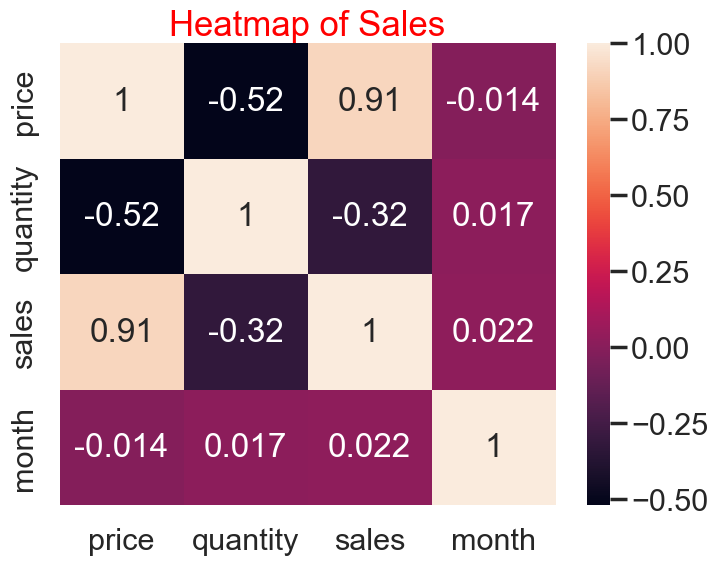

In [13]:
# heatmap
sns.set_theme('poster')
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(data=train.corr(),annot=True)
plt.title('Heatmap of Sales',color='red',fontsize=25)


Text(0.5, 1.0, 'Categories of Prodects')

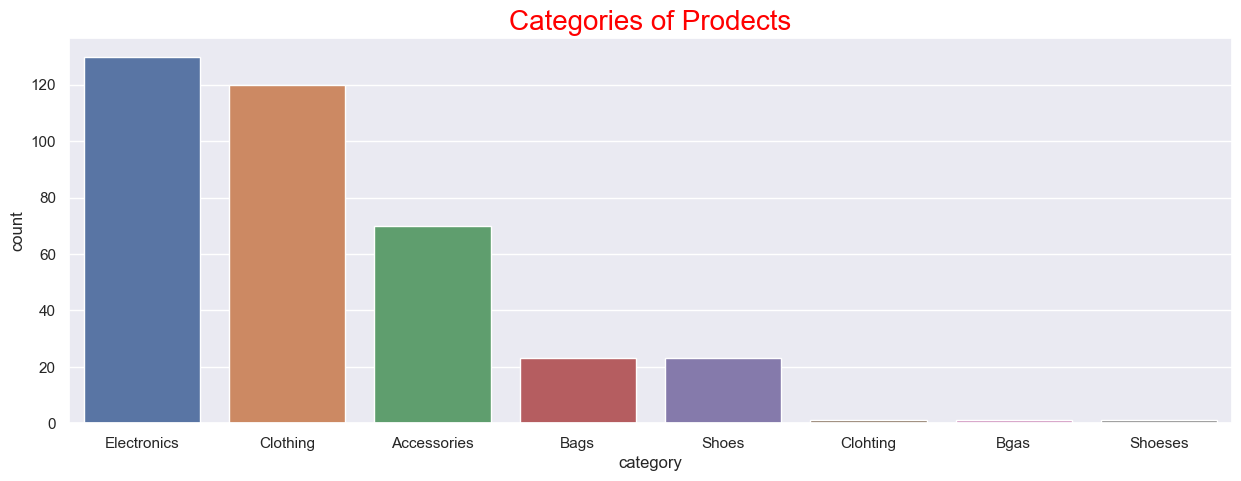

In [14]:
# Category
sns.set_theme('notebook')
plt.rcParams['figure.figsize'] = (15,5)
sns.countplot(data=train,x='category',)
plt.title('Categories of Prodects',color='red',fontsize=20)

Text(0.5, 1.0, 'Products')

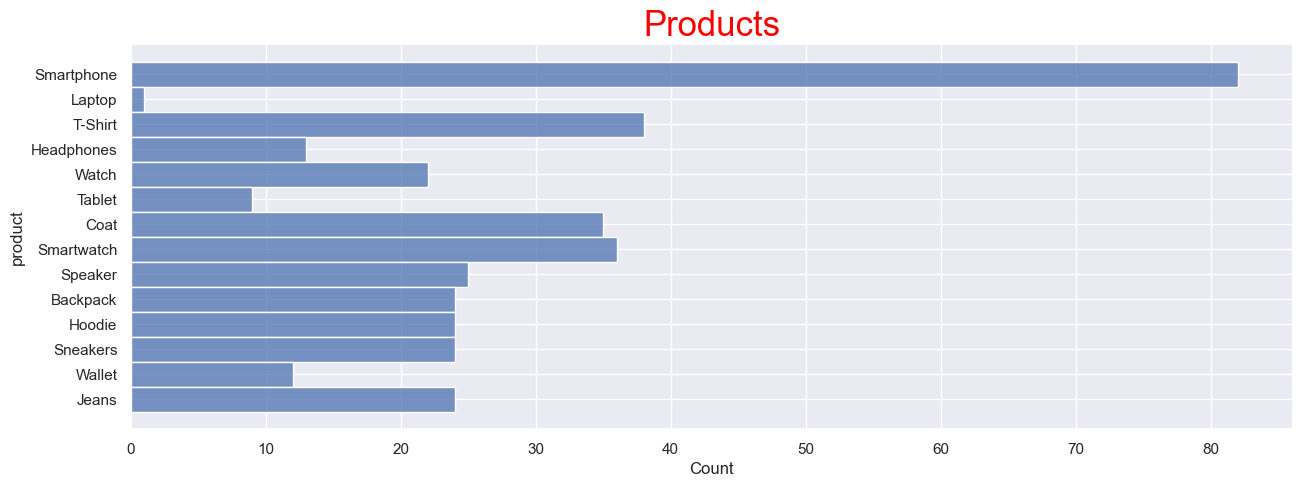

In [15]:
plt.rcParams['figure.figsize'] = (15,5)
sns.histplot(data=train,y='product')
plt.title('Products',color='red',fontsize=25)

Text(0.5, 1.0, 'Quantity for each Produect')

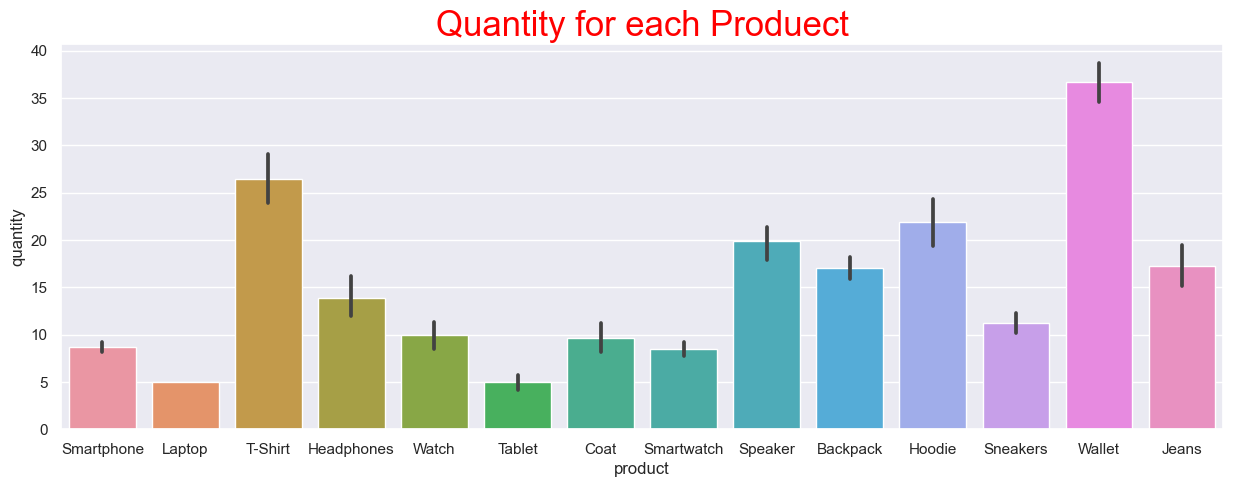

In [16]:
plt.rcParams['figure.figsize'] = (15,5)
sns.barplot(data=train,x='product',y='quantity')
plt.title('Quantity for each Produect',color='red',fontsize=25)

Text(0.5, 1.0, 'Price for each Produect')

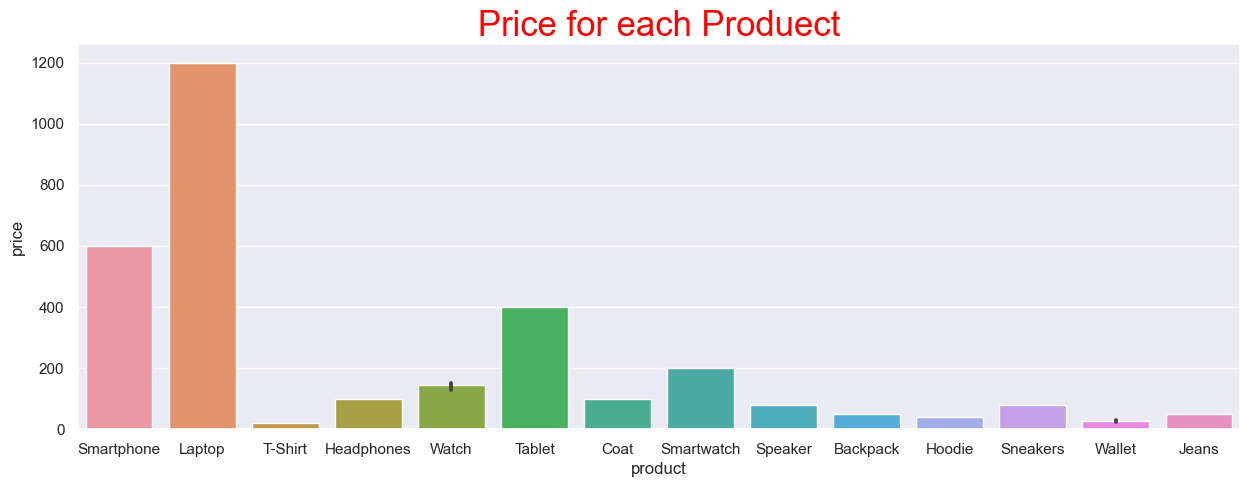

In [17]:
plt.rcParams['figure.figsize'] = (15,5)
sns.barplot(data=train,x='product',y='price')
plt.title('Price for each Produect',color='red',fontsize=25)

Text(0.5, 1.0, 'Sales for each Produect')

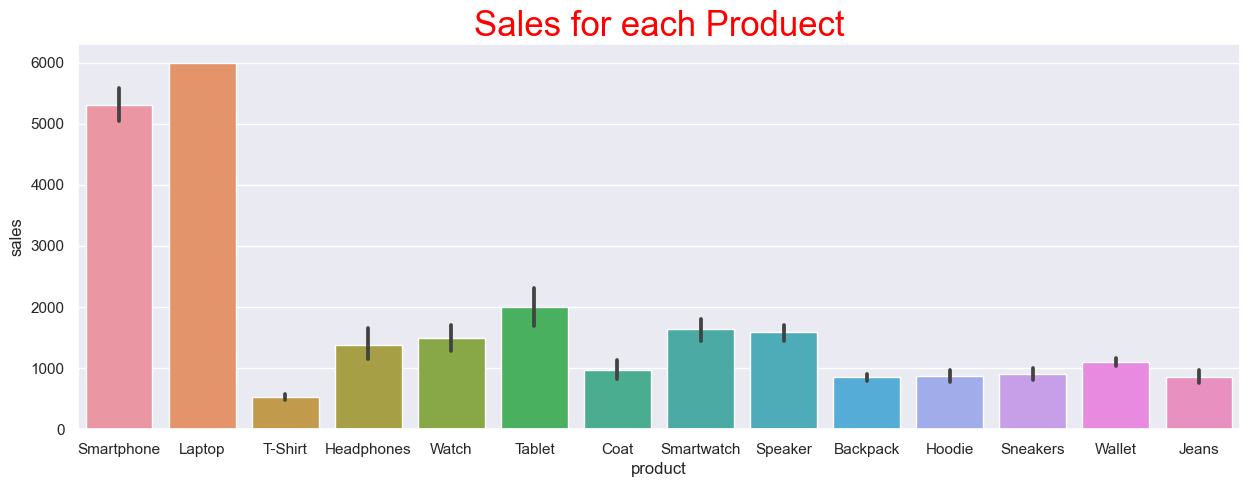

In [18]:
plt.rcParams['figure.figsize'] = (15,5)
sns.barplot(data=train,x='product',y='sales')
plt.title('Sales for each Produect',color='red',fontsize=25)

Text(0.5, 1.0, 'Sales for each Month')

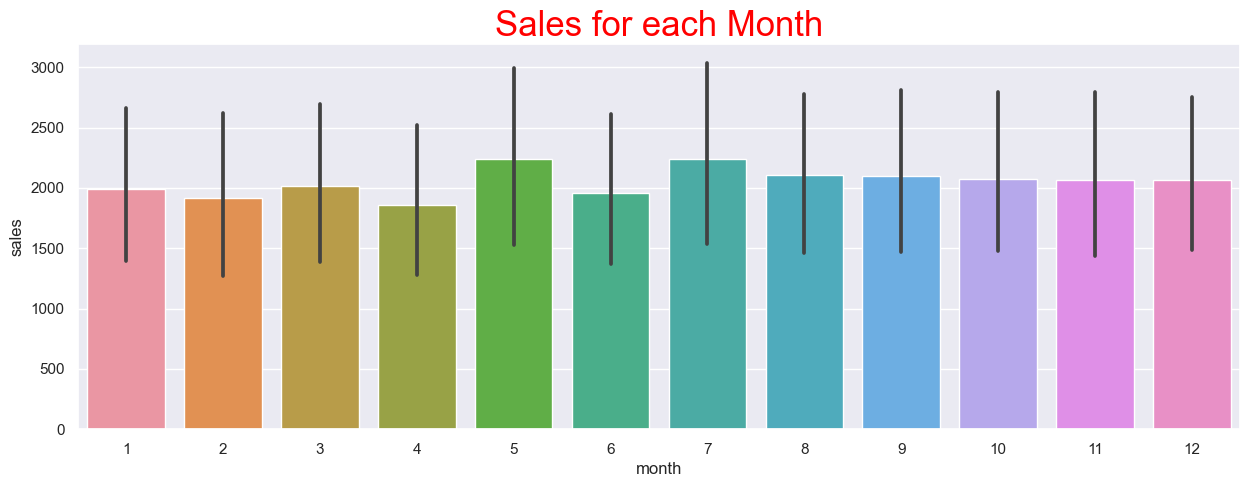

In [19]:
plt.rcParams['figure.figsize'] = (15,5)
sns.barplot(data=train,x='month',y='sales')
plt.title('Sales for each Month',color='red',fontsize=25)

Text(0.5, 1.0, 'Sales for each Category')

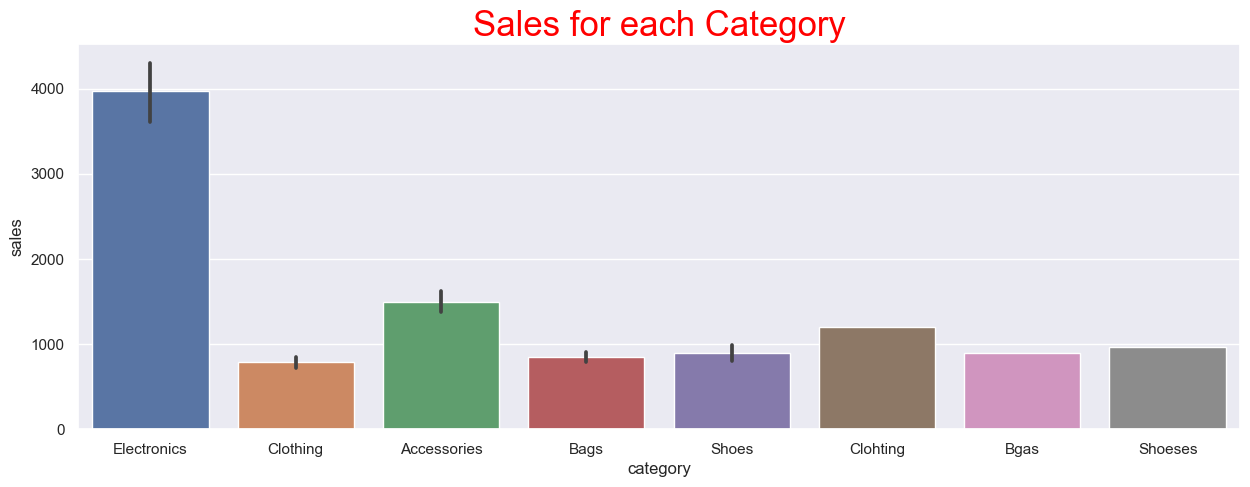

In [20]:
plt.rcParams['figure.figsize'] = (15,5)
sns.barplot(data=train,x='category',y='sales')
plt.title('Sales for each Category',color='red',fontsize=25)

Text(0.5, 1.0, 'Price and Quantity for each Produect')

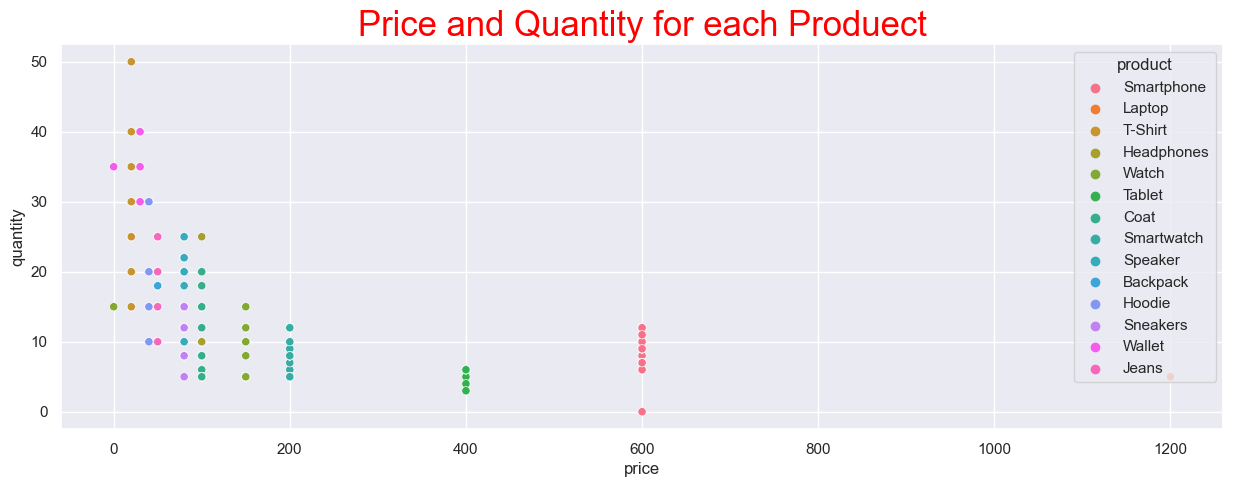

In [21]:
plt.rcParams['figure.figsize'] = (15,5)
sns.scatterplot(data=train,x='price',y='quantity',hue='product')
plt.title('Price and Quantity for each Produect',color='red',fontsize=25)